### Loading The Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
import pickle
import seaborn as sns; 
sns.set(style ='white', color_codes = True)

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, recall_score, precision_score, f1_score


data = pd.read_csv('C:\\Users\\aibar\\Desktop\\mlat1\\train.csv')
data.columns = map(str.lower, data.columns)

### EDA

In [2]:
# Check dimensions of the dataset
print("Dataset shape:", data.shape)

# Display summary statistics
print("Summary Statistics:")
print(data.describe())


Dataset shape: (56091, 64)
Summary Statistics:
                 gp       min_per          ortg           usg           efg  \
count  56091.000000  56091.000000  56091.000000  56091.000000  56091.000000   
mean      23.411973     37.325229     91.858295     18.149265     44.575513   
std       10.090542     28.061897     30.538819      6.204489     18.213813   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%       16.000000      9.500000     84.100000     14.500000     40.100000   
50%       28.000000     35.900000     97.100000     18.100000     47.700000   
75%       31.000000     62.200000    106.900000     21.800000     53.200000   
max       41.000000     98.000000    834.000000     50.000000    150.000000   

             ts_per       orb_per       drb_per       ast_per        to_per  \
count  56091.000000  56091.000000  56091.000000  56091.000000  56091.000000   
mean      47.676882      5.575376     12.673716     10.848740     20.337819   
std 

In [3]:
# Check data types
print("Data Types:")
print(data.dtypes)


Data Types:
team          object
conf          object
gp             int64
min_per      float64
ortg         float64
              ...   
stl          float64
blk          float64
pts          float64
player_id     object
drafted      float64
Length: 64, dtype: object


In [4]:
# Check for missing values and their percentages
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("Missing Data:")
print(missing_data)


Missing Data:
           Missing Values  Percentage
team                    0    0.000000
conf                    0    0.000000
gp                      0    0.000000
min_per                 0    0.000000
ortg                    0    0.000000
...                   ...         ...
stl                    38    0.067747
blk                    38    0.067747
pts                    38    0.067747
player_id               0    0.000000
drafted                 0    0.000000

[64 rows x 2 columns]


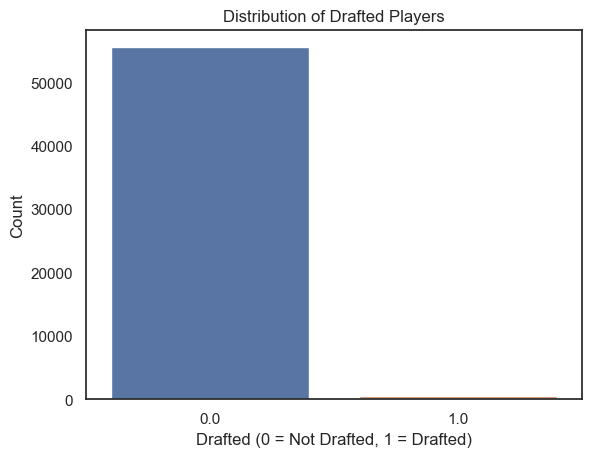

In [5]:
# Plot the distribution of the target variable
sns.countplot(x='drafted', data=data)
plt.title('Distribution of Drafted Players')
plt.xlabel('Drafted (0 = Not Drafted, 1 = Drafted)')
plt.ylabel('Count')
plt.show()


C:\Users\aibar\AppData\Local\Temp\ipykernel_31116\4164042128.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


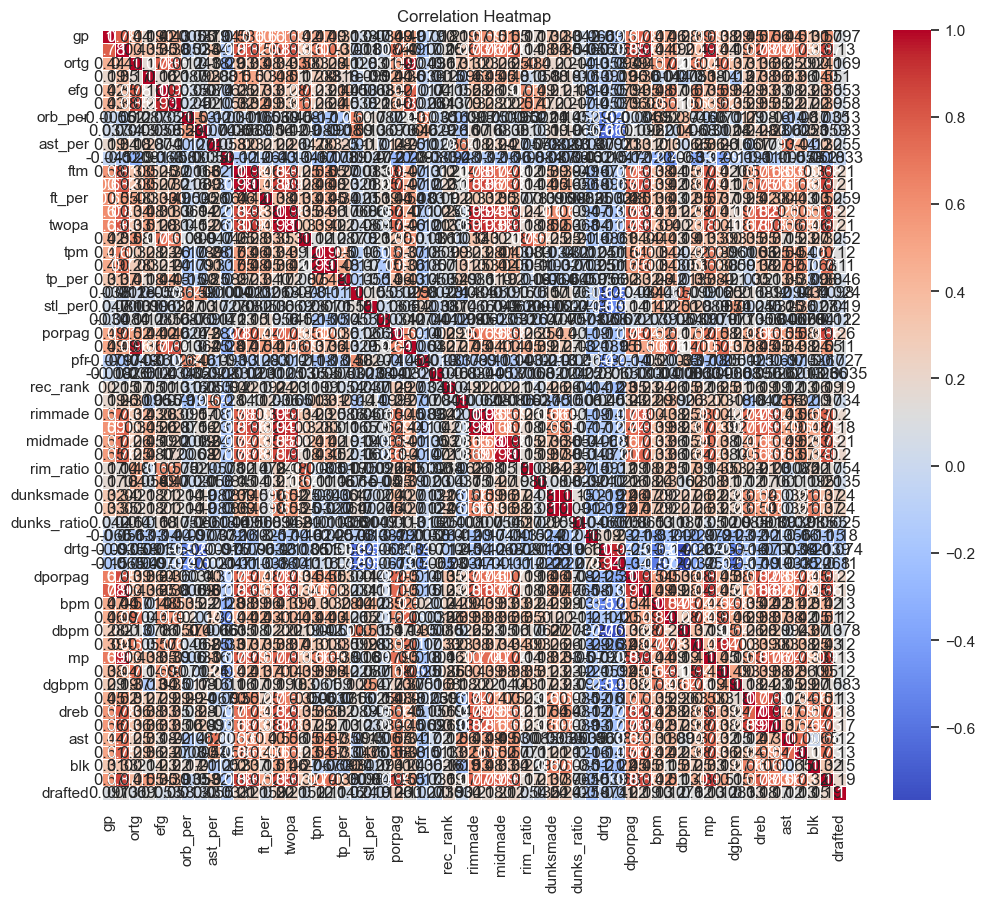

In [6]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot a heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


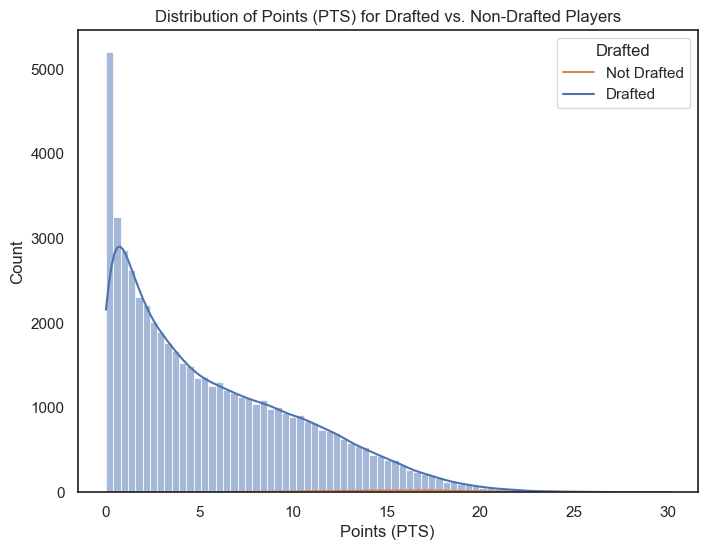

In [7]:
#  Distributions of 'pts' (points) for drafted and non-drafted players
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='pts', hue='drafted', kde=True)
plt.title('Distribution of Points (PTS) for Drafted vs. Non-Drafted Players')
plt.xlabel('Points (PTS)')
plt.ylabel('Count')
plt.legend(title='Drafted', labels=['Not Drafted', 'Drafted'])
plt.show()


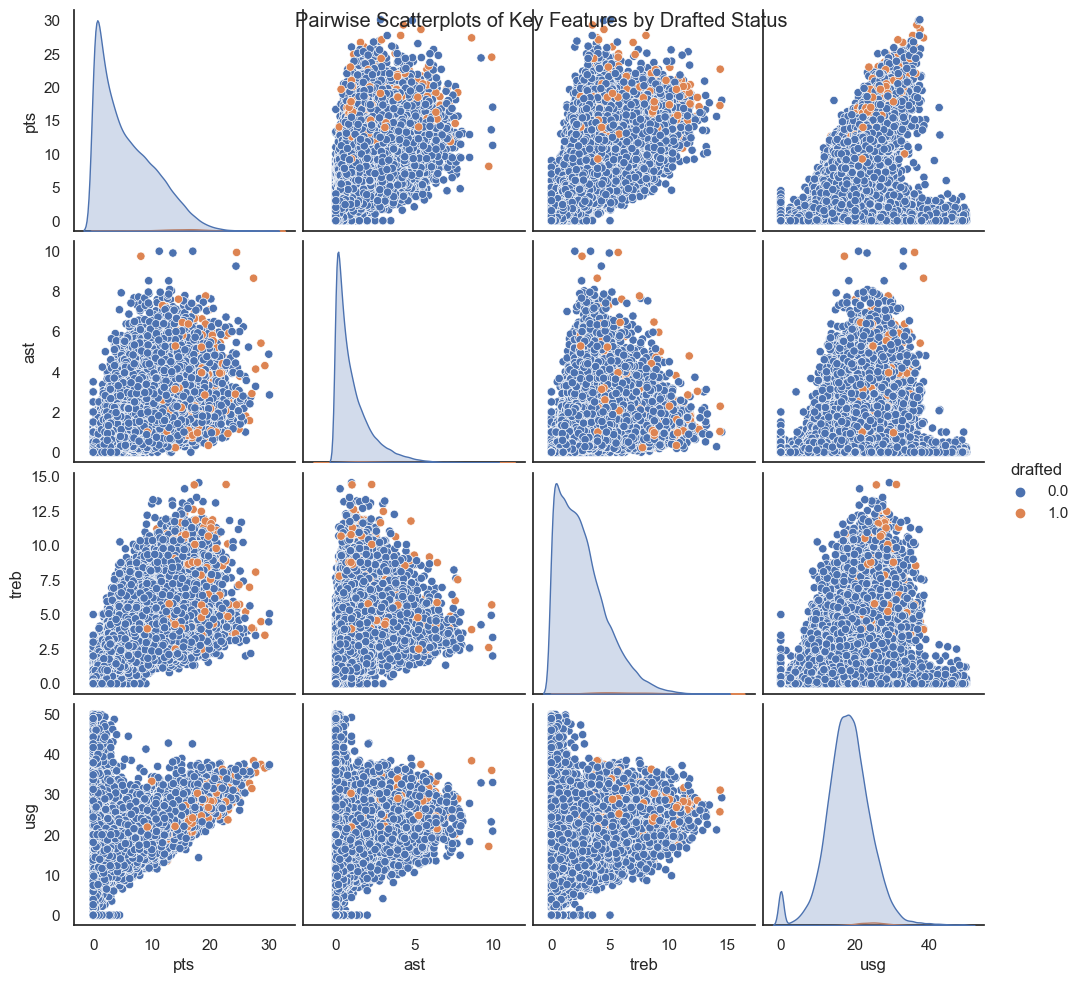

In [10]:
# Pairwise scatterplots
sns.pairplot(data=data, vars=['pts', 'ast', 'treb', 'usg'], hue='drafted', diag_kind='kde')
plt.suptitle('Pairwise Scatterplots of Key Features by Drafted Status')
plt.show()


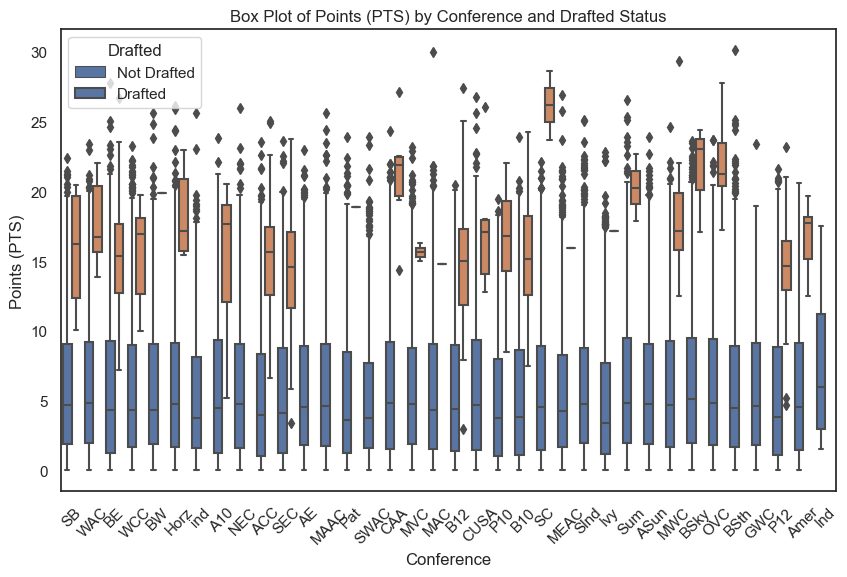

In [11]:
#  Box plot of 'conf' (conference) vs. 'drafted'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='conf', y='pts', hue='drafted')
plt.title('Box Plot of Points (PTS) by Conference and Drafted Status')
plt.xlabel('Conference')
plt.ylabel('Points (PTS)')
plt.xticks(rotation=45)
plt.legend(title='Drafted', labels=['Not Drafted', 'Drafted'])
plt.show()


### Modelling

In [ ]:


# Handle missing values (for simplicity, filling NaNs with 0)
data.fillna(0, inplace=True)


data = data[['gp', 'ftm', 'fta', 'twopm', 'twopa', 'tpm', 'tpa', 'year', 'min_per', 'ortg', 'usg', 'efg', 'ts_per', 'orb_per', 'drb_per',
       'ast_per', 'to_per', 'ft_per', 'twop_per', 'tp_per', 'blk_per',
       'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr', 'rec_rank', 'ast_tov',
       'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio',
       'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'drafted']]


# Splitting features and target variable
X = data.drop(['drafted'], axis=1)
y = data['drafted']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from imblearn.over_sampling import RandomOverSampler

# Create the RandomOverSampler object
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Resample the training data
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_scaled, y_train)


from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest, f_classif

# Initialize the SelectKBest object with the f_classif scoring function (appropriate for classification tasks)
k_best = SelectKBest(score_func=f_classif, k=5)

# Fit the k-best selector to your training data and transform it to select the top 5 features
X_train_top5 = k_best.fit_transform(X_train_balanced, y_train_balanced)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train.columns[selected_feature_indices]

# Print the names of the selected features
print("Selected Features:")
print(selected_features)


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Use the selected features to subset your data
X_train_selected = X_train_top5
X_test_selected = X_test_scaled[:, selected_feature_indices]

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_selected, y_train_balanced)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_selected)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

# define the models
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = xgb.XGBClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

def plot_roc_curve(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


models = [lr, rf, xgb, gb]

    
best_model = None
best_auroc = 0.0  # Initialize with a very low value

for model in models:
    scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring='roc_auc')
    mean_auroc = np.mean(scores)
    print(type(model).__name__)
    print("Mean ROC AUC:", mean_auroc)
    
    # Fit the model and calculate predicted probabilities
    model.fit(X_train_selected, y_train_balanced)
    y_pred_proba = model.predict_proba(X_test_selected)[:, 1]
    
    # Calculate ROC AUC score
    model_auroc = roc_auc_score(y_test, y_pred_proba)
    print("Test ROC AUC score:", model_auroc)
    
    if model_auroc > best_auroc:
        best_auroc = model_auroc
        best_model = model
        
    print("==============================")

# Print the best model with the highest AUROC score
print("Best model:", type(best_model).__name__, "with AUROC:", best_auroc)

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for class 1 (drafted)
y_pred_prob = rf_classifier.predict_proba(X_test_selected)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# Load and preprocess your test dataset
test = pd.read_csv('C:\\Users\\aibar\\Desktop\\mlat1\\test.csv') 
test.columns = map(str.lower, test.columns)
test.fillna(0, inplace=True)

test_data = test[['gp', 'ftm', 'fta', 'twopm', 'twopa', 'tpm', 'tpa', 'year', 'min_per', 'ortg', 'usg', 'efg', 'ts_per', 'orb_per', 'drb_per',
       'ast_per', 'to_per', 'ft_per', 'twop_per', 'tp_per', 'blk_per',
       'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr', 'rec_rank', 'ast_tov',
       'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio',
       'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts','player_id']]




# Splitting features for test data
X_test_data = test_data.drop(['player_id'], axis=1)  # Remove any identifier column that's not a feature

# Standardize the test features using the same scaler
X_test_data_scaled = scaler.transform(X_test_data)
X_test_data_scaled = X_test_data_scaled[:, selected_feature_indices]






# Make predictions on the test data
y_pred_prob_test = rf_classifier.predict_proba(X_test_data_scaled)[:, 1]  # Predicted probabilities for class 1 (drafted)

# Visualize predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_pred_prob_test, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Predicted Probability of Being Drafted')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()


from sklearn.model_selection import cross_val_score

# Initialize the RandomForestClassifier
#rf_classifier = RandomForestClassifier(random_state=42)

# Perform k-fold cross-validation (e.g., 5-fold)
cv_scores = cross_val_score(rf_classifier, X_train_selected, y_train_balanced, cv=5, scoring='roc_auc')

# Print the cross-validation scores
print("Cross-Validation ROC AUC Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the scores
print("Mean ROC AUC:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the Random Forest Classifier
#rf_classifier = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_selected, y_train_balanced)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_proba_test_tuned = best_rf_model.predict_proba(X_test_selected)[:, 1]

# Calculate ROC AUC score for the tuned model
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_test_tuned)
print("ROC AUC score for Tuned Model:", roc_auc_tuned)


# Create a DataFrame with player_id and predicted probabilities
result_df = pd.DataFrame({
    'player_id': test_data['player_id'],
    'drafted': y_pred_prob_test
})

# Display the resulting DataFrame
print(result_df)

compression_opts = dict(method='zip',
                         archive_name='C:\\Users\\aibar\\Desktop\\mlat1\\out_final.csv')  
result_df.to_csv('out_final.zip', index=False,
           compression=compression_opts)  